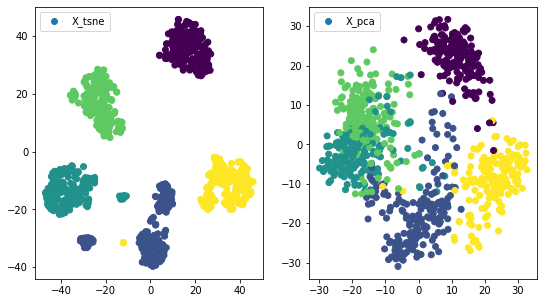

In [1]:
from sklearn import datasets
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tsne =TSNE(n_components=2, init='pca', random_state=0)
'''n_components维度降为2维,init设置embedding的初始化方式，可选random或者pca'''
X_tsne = tsne.fit_transform(X)
X_pca = PCA().fit_transform(X)

plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=digits.target,label='X_tsne')
plt.legend(loc='upper left')
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target,label='X_pca')
plt.legend(loc='upper left')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

n_components维度降为2维,init设置embedding的初始化方式，可选random或者pca
LLE: 0.091 sec
LTSA: 0.13 sec
Hessian LLE: 0.2 sec
Modified LLE: 0.16 sec
Isomap: 0.4 sec
MDS: 1.6 sec
SE: 0.066 sec
t-SNE: 1.9 sec


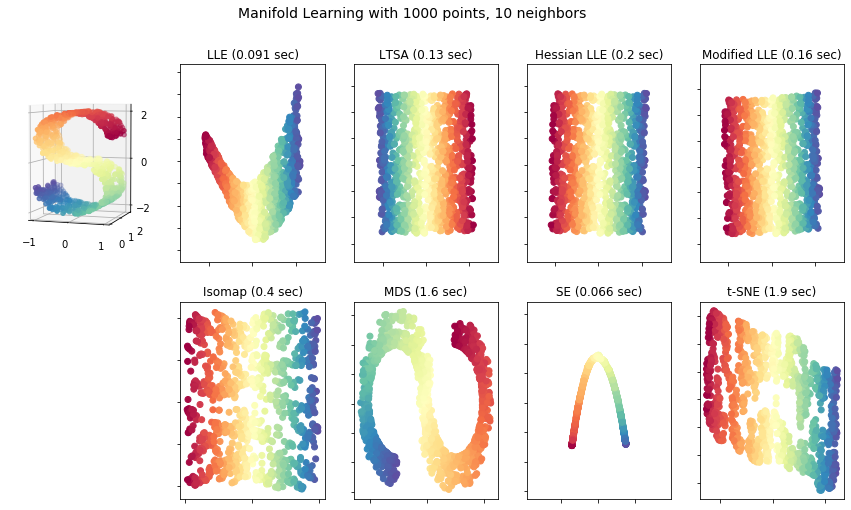

In [5]:

print(__doc__)

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

n_components维度降为2维,init设置embedding的初始化方式，可选random或者pca
Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap projection
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63546e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.360573
Computing Hessian LLE embedding
Done. Reconstruction error: 0.212807
Computing LTSA embedding
Done. Reconstruction error: 0.212804
Computing MDS embedding
Done. Stress: 141236613.778670
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding
Computing NCA projection


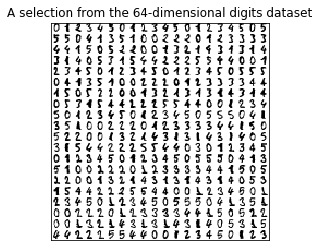

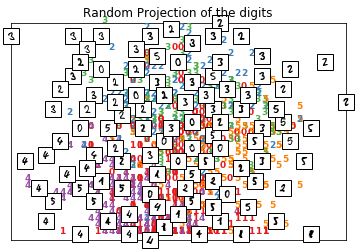

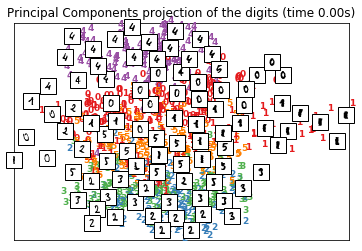

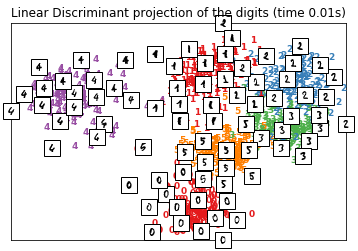

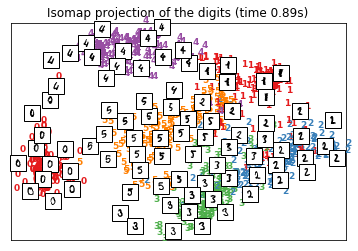

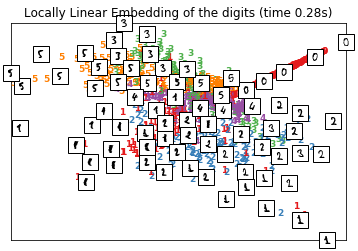

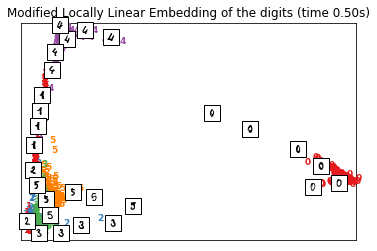

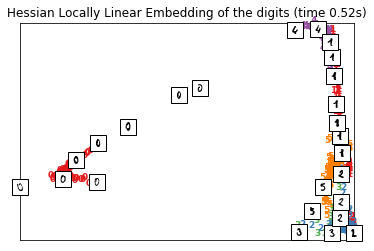

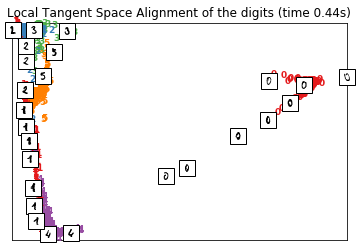

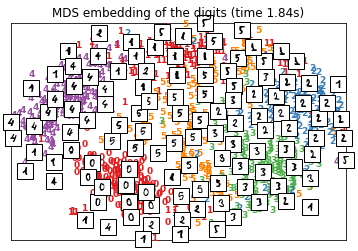

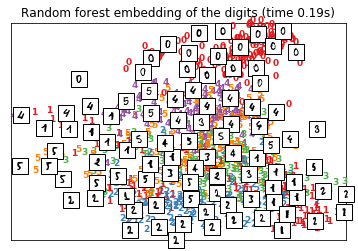

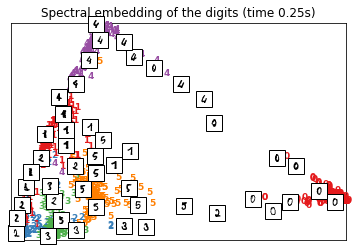

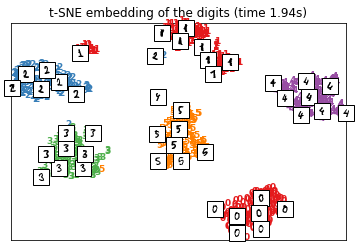

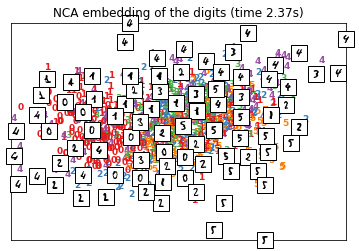

In [6]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
print(__doc__)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


# ----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


# ----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


# ----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2
                                                         ).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap projection")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2
                        ).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


# ----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


# ----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


# ----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


# ----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# NCA projection of the digits dataset
print("Computing NCA projection")
nca = neighbors.NeighborhoodComponentsAnalysis(init='random',
                                               n_components=2, random_state=0)
t0 = time()
X_nca = nca.fit_transform(X, y)

plot_embedding(X_nca,
               "NCA embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()


In [8]:
# Author: Tom Dupre la Tour
#
# License: BSD 3 clause
import time
import sys

try:
    import annoy
except ImportError:
    print("The package 'annoy' is required to run this example.")
    sys.exit()

try:
    import nmslib
except ImportError:
    print("The package 'nmslib' is required to run this example.")
    sys.exit()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from scipy.sparse import csr_matrix

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsTransformer
from sklearn.utils._testing import assert_array_almost_equal
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

print(__doc__)


class NMSlibTransformer(TransformerMixin, BaseEstimator):
    """Wrapper for using nmslib as sklearn's KNeighborsTransformer"""

    def __init__(self, n_neighbors=5, metric='euclidean', method='sw-graph',
                 n_jobs=1):
        self.n_neighbors = n_neighbors
        self.method = method
        self.metric = metric
        self.n_jobs = n_jobs

    def fit(self, X):
        self.n_samples_fit_ = X.shape[0]

        # see more metric in the manual
        # https://github.com/nmslib/nmslib/tree/master/manual
        space = {
            'sqeuclidean': 'l2',
            'euclidean': 'l2',
            'cosine': 'cosinesimil',
            'l1': 'l1',
            'l2': 'l2',
        }[self.metric]

        self.nmslib_ = nmslib.init(method=self.method, space=space)
        self.nmslib_.addDataPointBatch(X)
        self.nmslib_.createIndex()
        return self

    def transform(self, X):
        n_samples_transform = X.shape[0]

        # For compatibility reasons, as each sample is considered as its own
        # neighbor, one extra neighbor will be computed.
        n_neighbors = self.n_neighbors + 1

        results = self.nmslib_.knnQueryBatch(X, k=n_neighbors,
                                             num_threads=self.n_jobs)
        indices, distances = zip(*results)
        indices, distances = np.vstack(indices), np.vstack(distances)

        if self.metric == 'sqeuclidean':
            distances **= 2

        indptr = np.arange(0, n_samples_transform * n_neighbors + 1,
                           n_neighbors)
        kneighbors_graph = csr_matrix((distances.ravel(), indices.ravel(),
                                       indptr), shape=(n_samples_transform,
                                                       self.n_samples_fit_))

        return kneighbors_graph


class AnnoyTransformer(TransformerMixin, BaseEstimator):
    """Wrapper for using annoy.AnnoyIndex as sklearn's KNeighborsTransformer"""

    def __init__(self, n_neighbors=5, metric='euclidean', n_trees=10,
                 search_k=-1):
        self.n_neighbors = n_neighbors
        self.n_trees = n_trees
        self.search_k = search_k
        self.metric = metric

    def fit(self, X):
        self.n_samples_fit_ = X.shape[0]
        metric = self.metric if self.metric != 'sqeuclidean' else 'euclidean'
        self.annoy_ = annoy.AnnoyIndex(X.shape[1], metric=metric)
        for i, x in enumerate(X):
            self.annoy_.add_item(i, x.tolist())
        self.annoy_.build(self.n_trees)
        return self

    def transform(self, X):
        return self._transform(X)

    def fit_transform(self, X, y=None):
        return self.fit(X)._transform(X=None)

    def _transform(self, X):
        """As `transform`, but handles X is None for faster `fit_transform`."""

        n_samples_transform = self.n_samples_fit_ if X is None else X.shape[0]

        # For compatibility reasons, as each sample is considered as its own
        # neighbor, one extra neighbor will be computed.
        n_neighbors = self.n_neighbors + 1

        indices = np.empty((n_samples_transform, n_neighbors),
                           dtype=np.int)
        distances = np.empty((n_samples_transform, n_neighbors))

        if X is None:
            for i in range(self.annoy_.get_n_items()):
                ind, dist = self.annoy_.get_nns_by_item(
                    i, n_neighbors, self.search_k, include_distances=True)

                indices[i], distances[i] = ind, dist
        else:
            for i, x in enumerate(X):
                indices[i], distances[i] = self.annoy_.get_nns_by_vector(
                    x.tolist(), n_neighbors, self.search_k,
                    include_distances=True)

        if self.metric == 'sqeuclidean':
            distances **= 2

        indptr = np.arange(0, n_samples_transform * n_neighbors + 1,
                           n_neighbors)
        kneighbors_graph = csr_matrix((distances.ravel(), indices.ravel(),
                                       indptr), shape=(n_samples_transform,
                                                       self.n_samples_fit_))

        return kneighbors_graph


def test_transformers():
    """Test that AnnoyTransformer and KNeighborsTransformer give same results
    """
    X = np.random.RandomState(42).randn(10, 2)

    knn = KNeighborsTransformer()
    Xt0 = knn.fit_transform(X)

    ann = AnnoyTransformer()
    Xt1 = ann.fit_transform(X)

    nms = NMSlibTransformer()
    Xt2 = nms.fit_transform(X)

    assert_array_almost_equal(Xt0.toarray(), Xt1.toarray(), decimal=5)
    assert_array_almost_equal(Xt0.toarray(), Xt2.toarray(), decimal=5)


def load_mnist(n_samples):
    """Load MNIST, shuffle the data, and return only n_samples."""
    mnist = fetch_openml("mnist_784")
    X, y = shuffle(mnist.data, mnist.target, random_state=2)
    return X[:n_samples] / 255, y[:n_samples]


def run_benchmark():
    datasets = [
        ('MNIST_2000', load_mnist(n_samples=2000)),
        ('MNIST_10000', load_mnist(n_samples=10000)),
    ]

    n_iter = 500
    perplexity = 30
    # TSNE requires a certain number of neighbors which depends on the
    # perplexity parameter.
    # Add one since we include each sample as its own neighbor.
    n_neighbors = int(3. * perplexity + 1) + 1

    transformers = [
        ('AnnoyTransformer', AnnoyTransformer(n_neighbors=n_neighbors,
                                              metric='sqeuclidean')),
        ('NMSlibTransformer', NMSlibTransformer(n_neighbors=n_neighbors,
                                                metric='sqeuclidean')),
        ('KNeighborsTransformer', KNeighborsTransformer(
            n_neighbors=n_neighbors, mode='distance', metric='sqeuclidean')),
        ('TSNE with AnnoyTransformer', make_pipeline(
            AnnoyTransformer(n_neighbors=n_neighbors, metric='sqeuclidean'),
            TSNE(metric='precomputed', perplexity=perplexity,
                 method="barnes_hut", random_state=42, n_iter=n_iter), )),
        ('TSNE with NMSlibTransformer', make_pipeline(
            NMSlibTransformer(n_neighbors=n_neighbors, metric='sqeuclidean'),
            TSNE(metric='precomputed', perplexity=perplexity,
                 method="barnes_hut", random_state=42, n_iter=n_iter), )),
        ('TSNE with KNeighborsTransformer', make_pipeline(
            KNeighborsTransformer(n_neighbors=n_neighbors, mode='distance',
                                  metric='sqeuclidean'),
            TSNE(metric='precomputed', perplexity=perplexity,
                 method="barnes_hut", random_state=42, n_iter=n_iter), )),
        ('TSNE with internal NearestNeighbors',
         TSNE(metric='sqeuclidean', perplexity=perplexity, method="barnes_hut",
              random_state=42, n_iter=n_iter)),
    ]

    # init the plot
    nrows = len(datasets)
    ncols = np.sum([1 for name, model in transformers if 'TSNE' in name])
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, squeeze=False,
                             figsize=(5 * ncols, 4 * nrows))
    axes = axes.ravel()
    i_ax = 0

    for dataset_name, (X, y) in datasets:

        msg = 'Benchmarking on %s:' % dataset_name
        print('\n%s\n%s' % (msg, '-' * len(msg)))

        for transformer_name, transformer in transformers:
            start = time.time()
            Xt = transformer.fit_transform(X)
            duration = time.time() - start

            # print the duration report
            longest = np.max([len(name) for name, model in transformers])
            whitespaces = ' ' * (longest - len(transformer_name))
            print('%s: %s%.3f sec' % (transformer_name, whitespaces, duration))

            # plot TSNE embedding which should be very similar across methods
            if 'TSNE' in transformer_name:
                axes[i_ax].set_title(transformer_name + '\non ' + dataset_name)
                axes[i_ax].scatter(Xt[:, 0], Xt[:, 1], c=y.astype(np.int32),
                                   alpha=0.2, cmap=plt.cm.viridis)
                axes[i_ax].xaxis.set_major_formatter(NullFormatter())
                axes[i_ax].yaxis.set_major_formatter(NullFormatter())
                axes[i_ax].axis('tight')
                i_ax += 1

    fig.tight_layout()
    plt.show()



test_transformers()
run_benchmark()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



The package 'annoy' is required to run this example.
Traceback (most recent call last):
  File "<ipython-input-8-07f9a828e2b3>", line 8, in <module>
    import annoy
ModuleNotFoundError: No module named 'annoy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zk/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-07f9a828e2b3>", line 11, in <module>
    sys.exit()
SystemExit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zk/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/zk/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 319, in wrapped
    return f(*args, **kwargs)
  File "

SystemExit: 

(901, 64)
Computing random projection
Computing PCA projection
Computing LDA projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.11351e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.282777
Computing Hessian LLE embedding
Done. Reconstruction error: 0.158393
Computing LTSA embedding
Done. Reconstruction error: 0.158394
Computing MDS embedding
Done. Stress: 84199620.356189
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding
(901, 3)


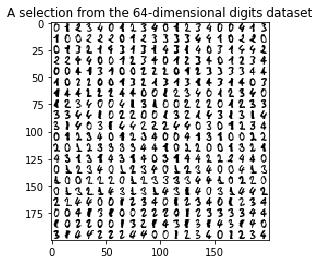

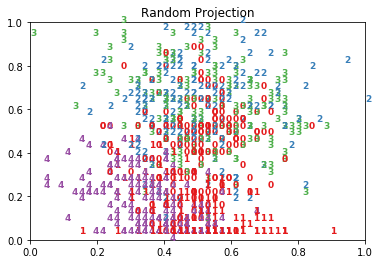

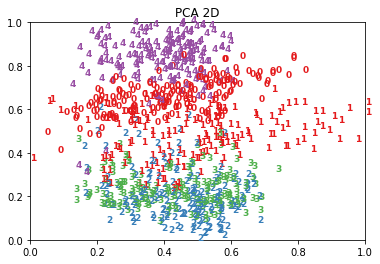

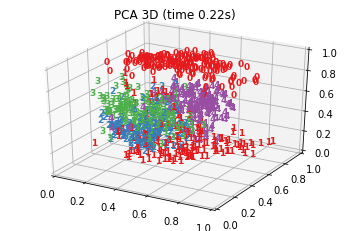

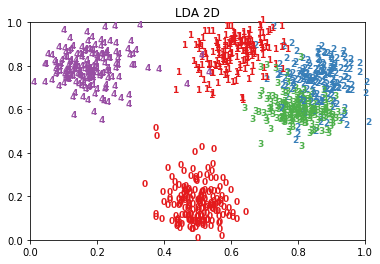

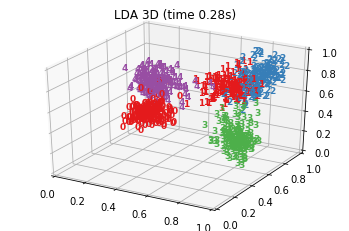

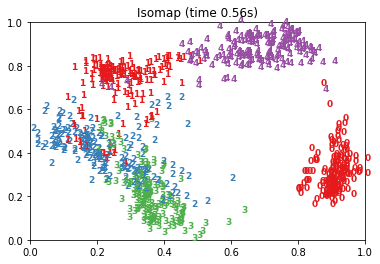

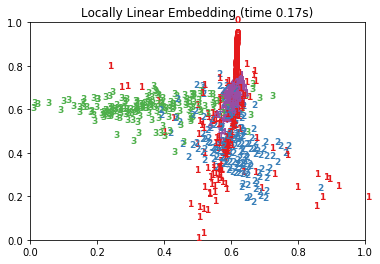

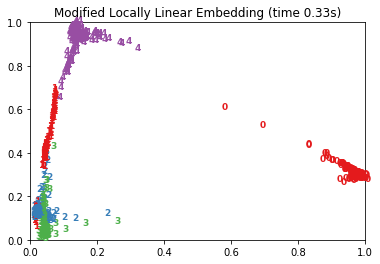

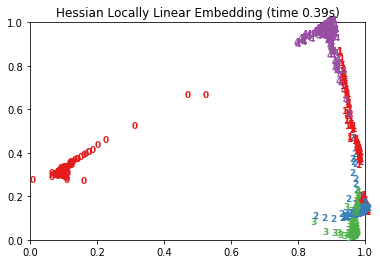

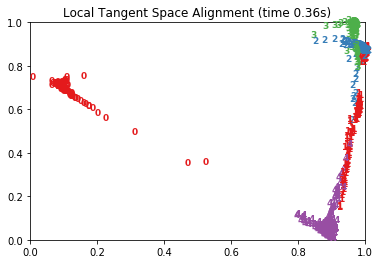

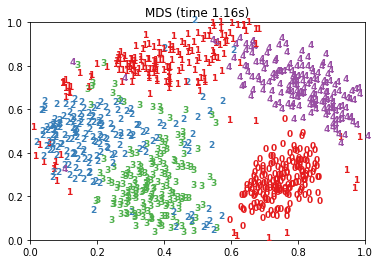

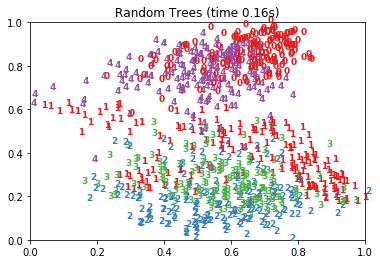

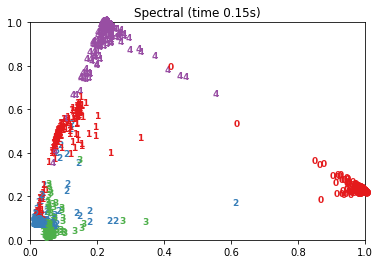

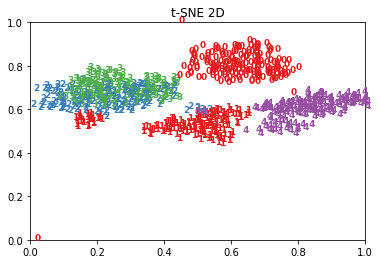

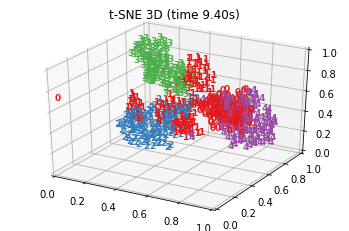

In [15]:
#coding:utf-8
"""
CreatedCreated on Fri May 22 2015
@author: wepon
@blog；
"""
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import (manifold, datasets, decomposition, ensemble,random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#%%
#加载数据，显示数据
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target
print (X.shape)
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.title('A selection from the 64-dimensional digits dataset')

#LLE,Isomap,LTSA需要设置n_neighbors这个参数
n_neighbors = 30


#%%
# 将降维后的数据可视化,2维
def plot_embedding_2d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

#%%
#将降维后的数据可视化,3维
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)


#%%
#随机映射
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_2d(X_projected, "Random Projection")

#%%
#PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)
plot_embedding_2d(X_pca[:,0:2],"PCA 2D")
plot_embedding_3d(X_pca,"PCA 3D (time %.2fs)" %(time() - t0))

#%%
#LDA
print("Computing LDA projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = LDA(n_components=3).fit_transform(X2, y)
plot_embedding_2d(X_lda[:,0:2],"LDA 2D" )
plot_embedding_3d(X_lda,"LDA 3D (time %.2fs)" %(time() - t0))



#%%
#Isomap
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding_2d(X_iso,"Isomap (time %.2fs)" %(time() - t0))


#%%
#standard LLE
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_lle,"Locally Linear Embedding (time %.2fs)" %(time() - t0))


#%%
#modified LLE
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_mlle,"Modified Locally Linear Embedding (time %.2fs)" %(time() - t0))


#%%
# HLLE
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_hlle,"Hessian Locally Linear Embedding (time %.2fs)" %(time() - t0))


#%%
# LTSA
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_ltsa,"Local Tangent Space Alignment (time %.2fs)" %(time() - t0))

#%%
# MDS
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding_2d(X_mds,"MDS (time %.2fs)" %(time() - t0))

#%%
# Random Trees
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_2d(X_reduced,"Random Trees (time %.2fs)" %(time() - t0))

#%%
# Spectral
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)
plot_embedding_2d(X_se,"Spectral (time %.2fs)" %(time() - t0))

#%%
# t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time() - t0))

plt.show()